In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("C:/Users/keert/Downloads/online+retail/Online Retail.xlsx")

In [9]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [15]:
# Preview column names to check their actual labels
print(data.columns)

# Drop irrelevant columns if they exist
columns_to_drop = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1)

Index(['Quantity', 'UnitPrice', 'Country', 'Purchased'], dtype='object')


In [16]:
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

In [18]:
X = data.drop('Purchased', axis=1)
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2156
           1       1.00      1.00      1.00    106226

    accuracy                           1.00    108382
   macro avg       1.00      1.00      1.00    108382
weighted avg       1.00      1.00      1.00    108382



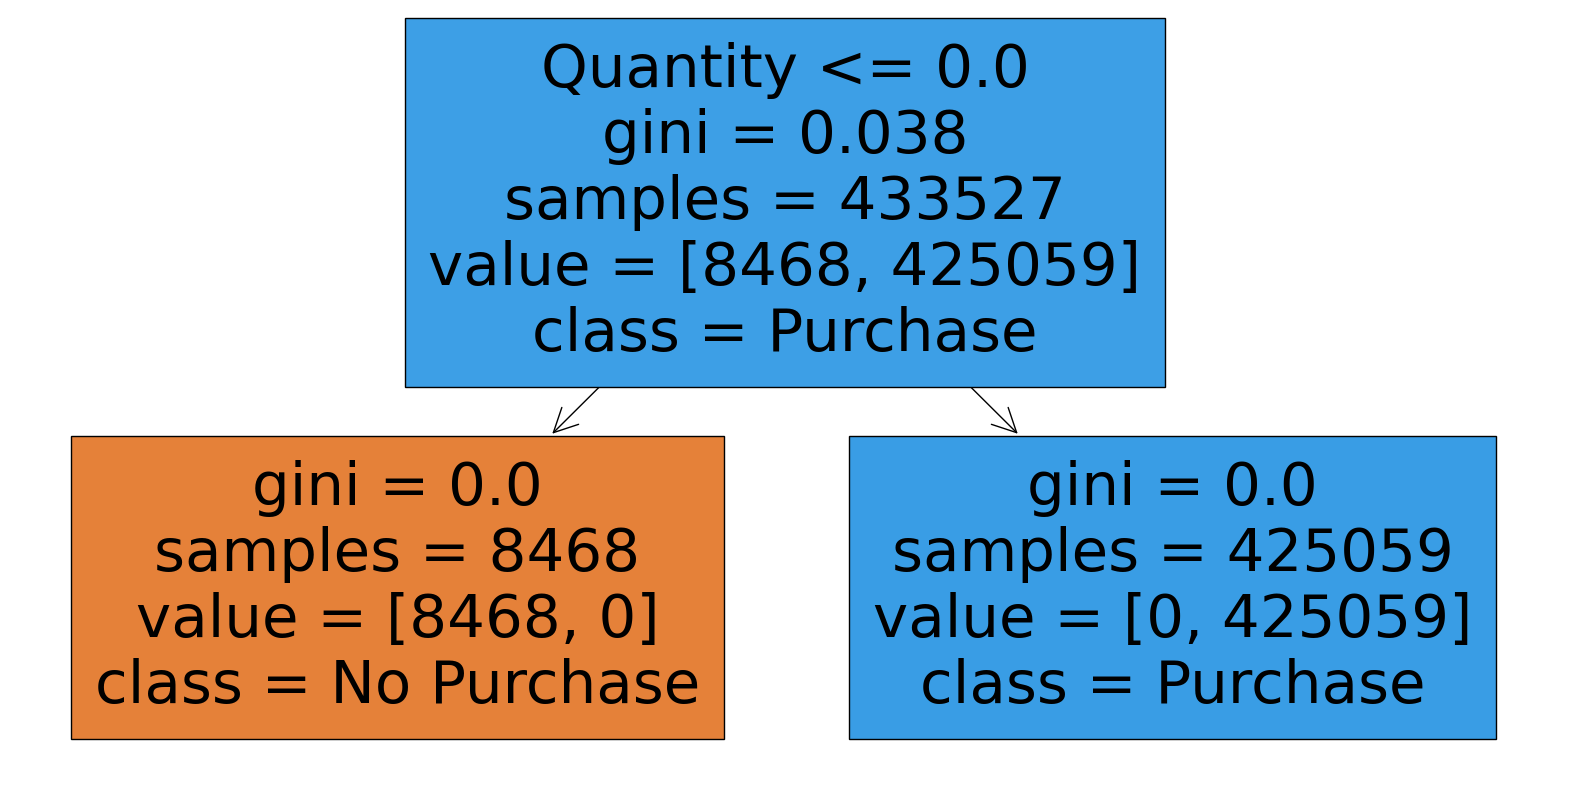

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()